In [6]:
import numpy as np
import pandas as pd 
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 
df = pd.read_csv(r"D:\VIKAS\Heart-Disease-Predection\notebooks\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:

df.rename(columns={'BP':'Blood Pressure','FBS over 120':'Sugre Blood Value', 'Max HR':'Max heart rate','ST depression':'Segment Depression'},inplace=True)

In [7]:
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})


In [8]:
df.head()

,Age,Sex,Chest pain type,Blood Pressure,Cholesterol,Sugre Blood Value,EKG results,Max heart rate,Exercise angina,Segment Depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [9]:
X = df.drop(['Heart Disease'],axis=1)
y = df['Heart Disease']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [11]:
print("The shape of x_train is ",X_train.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of x_test is ",X_test.shape)
print("The shape of y_test is ",y_test.shape)

The shape of x_train is  (243, 13)
The shape of y_train is  (243,)
The shape of x_test is  (27, 13)
The shape of y_test is  (27,)


In [12]:
import dagshub
import mlflow

mlflow.set_tracking_uri('https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow')
dagshub.init(repo_owner='ayazr425', repo_name='Heart-Disease-Pred-proj', mlflow=True)

Accessing as ayazr425

Initialized MLflow to track repo "ayazr425/Heart-Disease-Pred-proj"

Repository ayazr425/Heart-Disease-Pred-proj initialized!

#### Hyperparameter Tuning of Decision Tree Classifier using Grid Search Cross-Validation

In [21]:
import mlflow
import logging
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Set MLflow experiment
mlflow.set_experiment("DECISIONTREE WITH GRID SEARCH CV")

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Define training function
def training_model(X_train_scaled, X_test_scaled, y_train, y_test):
    start_time = time.time()
    
    logging.info("Applying GridSearchCV for Decision Tree")
    grid_search = GridSearchCV(
        DecisionTreeClassifier(),
        dt_param_grid,
        cv=5,  # Basic K-Fold Cross-Validation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    logging.info(f"Best Parameters for Decision Tree: {best_params}")
    
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    logging.info(f"Training complete. Accuracy: {acc:.4f}")
    
    end_time = time.time()
    logging.info(f"Training time: {end_time - start_time:.2f} seconds.")
    
    return best_model, acc, cm, precision, recall, f1

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Start MLflow run
with mlflow.start_run(run_name="Decision_Tree_Run"):
    logging.info("Training Decision Tree...")
    best_model, acc, cm, precision, recall, f1 = training_model(X_train_scaled, X_test_scaled, y_train, y_test)
    
    mlflow.log_params(best_model.get_params())
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    
    mlflow.sklearn.log_model(best_model, "Decision_Tree_Model")
    logging.info("Completed logging for Decision Tree.")


2025/04/14 14:10:39 INFO mlflow.tracking.fluent: Experiment with name 'DECISIONTREE WITH GRID SEARCH CV' does not exist. Creating a new experiment.
2025-04-14 14:10:49,539 - INFO - Training Decision Tree...
2025-04-14 14:10:49,542 - INFO - Applying GridSearchCV for Decision Tree


Fitting 5 folds for each of 90 candidates, totalling 450 fits


2025-04-14 14:10:50,617 - INFO - Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
2025-04-14 14:10:50,636 - INFO - Training complete. Accuracy: 0.8519
2025-04-14 14:10:50,637 - INFO - Training time: 1.10 seconds.
2025/04/14 14:11:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2025-04-14 14:11:05,539 - INFO - Completed logging for Decision Tree.
2025/04/14 14:11:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision_Tree_Run at: https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow/#/experiments/5/runs/c650fead69c3487ca37d5b5d561f4131.
2025/04/14 14:11:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/ayazr425/Heart-Disease-Pred-proj.mlflow/#/experiments/5.


##### ROC CURVE


ROC AUC Score: 0.8118


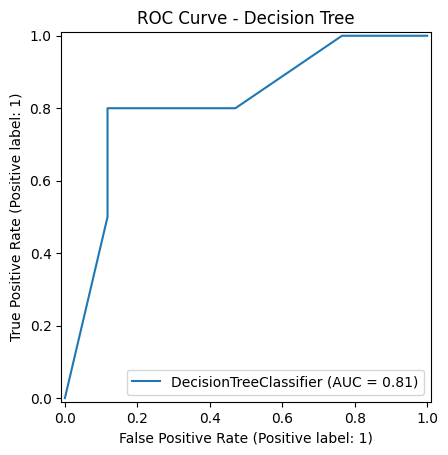

In [23]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
# Binary classification assumed (0 and 1)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_proba)

print(f"\nROC AUC Score: {auc:.4f}")

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()